In [22]:
import pandas as pd
import seaborn as sn

In [66]:
df_sales = pd.read_csv("../data/sales_train.csv")
df_item = pd.read_csv("../data/items.csv")
df_cat = pd.read_csv("../data/item_categories.csv")
df_shop = pd.read_csv("../data/shops.csv")

df = df_sales.join(df_item.set_index('item_id'), on="item_id")
df = df.join(df_cat.set_index("item_category_id"), on="item_category_id")
df = df.join(df_shop.set_index("shop_id"),  on="shop_id")
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум"""


# Pre-processing Data

In [67]:
df['datetime'] = pd.to_datetime(df['date'])
df['month'] = df['datetime'].dt.month
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,datetime,month
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013-02-01,2
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013-03-01,3
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013-05-01,5
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013-06-01,6
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",2013-01-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",2015-10-10,10
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",2015-09-10,9
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",2015-10-14,10
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум""",2015-10-22,10


<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_day'>

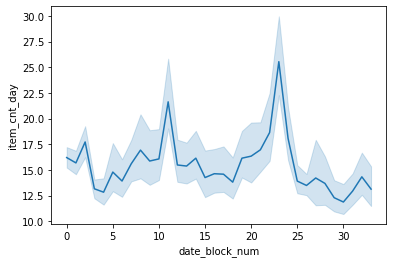

In [56]:
sn.lineplot(data=df_tmp, x='date_block_num', y="item_cnt_day")

In [72]:
df_tmp = df.groupby(["date_block_num", "item_id"]).sum()
df_tmp = df_tmp.reset_index()
df_train = df_tmp[df_tmp['date_block_num'] < 24]
df_valid = df_tmp[df_tmp['date_block_num'] >= 24]

<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_day'>

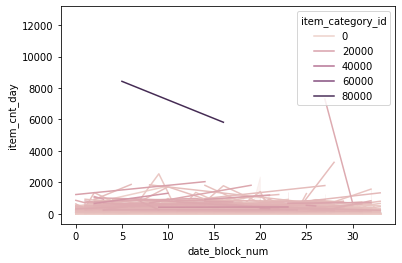

In [59]:
sn.lineplot(data=df_tmp, x='date_block_num', y="item_cnt_day", hue="item_category_id")

In [65]:
len(pd.unique(df_tmp['shop_id']))

6181